In [1]:
# Example credit to: scikit-opt

from scipy import spatial
import numpy as np
import matplotlib.pyplot as plt
from sko.ACA import ACA_TSP
import pandas as pd

num_points = 20
dataset_size = 1    # Single set of coords
tsp_size = 20
points_coordinates = np.random.uniform(size=(dataset_size, tsp_size, 2))
distance_matrix = spatial.distance.cdist(points_coordinates[0], points_coordinates[0], metric='euclidean')

In [2]:
len(points_coordinates[0])

20

In [3]:
def cal_total_distance(routine):
    '''Get the total distance between all nodes
    '''
    num_points, = routine.shape
    return sum([distance_matrix[routine[i % num_points], routine[(i + 1) % num_points]] for i in range(num_points)])

In [4]:
import time

# Initialise ACA, using euclidean distance as objective function
aca = ACA_TSP(func=cal_total_distance, n_dim=num_points,
              size_pop=5, max_iter=200,
              distance_matrix=distance_matrix)

# Run ACA and report total time as well as final distance
start_time = time.time()
best_points, best_distance = aca.run()
print("--- %s seconds ---" % (time.time() - start_time))
print(best_points, best_distance, cal_total_distance(best_points))


--- 1.187732219696045 seconds ---
[ 0  1 16  6 18 17 13  2 12 10 14 11 15  5  8  3 19  4  9  7] 3.704625823729309 3.704625823729309


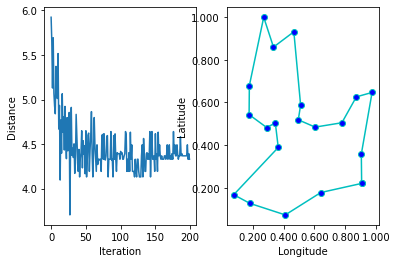

In [5]:
from matplotlib.ticker import FormatStrFormatter

fig, ax = plt.subplots(1, 2)

best_points_ = np.concatenate([best_points, [best_points[0]]])
best_points_coordinate = points_coordinates[0][best_points_, :]
ax[0].plot(aca.y_best_history)
ax[0].set_xlabel("Iteration")
ax[0].set_ylabel("Distance")
ax[1].plot(best_points_coordinate[:, 0], best_points_coordinate[:, 1],
           marker='o', markerfacecolor='b', color='c', linestyle='-')
ax[1].xaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax[1].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax[1].set_xlabel("Longitude")
ax[1].set_ylabel("Latitude")
plt.show()

In [9]:
from ACA import run_ACA

run_ACA(coordinates = points_coordinates,
iterations=300,
population = 5, 
alpha = 0.5,
beta = 0.5,
rho = 0.5
)

(4.935811924584616,
 array([ 0,  1,  6, 16,  2, 11, 12, 10, 14, 15,  5,  8,  3,  7,  9, 19,  4,
        13, 17, 18]),
 1.8384974002838135)

In [ ]:
"""
 \       /
  \     /  
   \.-./ 
  (o\^/o)  _   _   _     __
   ./ \.\ ( )-( )-( ) .-'  '-.
    {-} \(//  ||   \\/ (   )) '-.
         //-__||__.-\\.       .-'
        (/    ()     \)'-._.-'
        ||    ||      \\
        ('    ('       ')
    """